In [1]:
%matplotlib inline

报错记录：

2026-01-27 19:51:24,042 [ERROR][_create_connection]: Failed to create new connection using: 09b26011e49e4edbb18312c5fcae85b7 (milvus_client.py:916)
Traceback (most recent call last):
  File "/workspace/all-in-rag/code/C3/04_multi_milvus.py", line 69, in <module>
    milvus_client = MilvusClient(uri=MILVUS_URI)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/root/miniconda/envs/myrag/lib/python3.12/site-packages/pymilvus/milvus_client/milvus_client.py", line 64, in __init__
    self._using = self._create_connection(
                  ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/root/miniconda/envs/myrag/lib/python3.12/site-packages/pymilvus/milvus_client/milvus_client.py", line 917, in _create_connection
    raise ex from ex
  File "/root/miniconda/envs/myrag/lib/python3.12/site-packages/pymilvus/milvus_client/milvus_client.py", line 914, in _create_connection
    connections.connect(using, user, password, db_name, token, uri=uri, **kwargs)
  File "/root/miniconda/envs/myrag/lib/python3.12/site-packages/pymilvus/orm/connections.py", line 465, in connect
    connect_milvus(**kwargs, user=user, password=password, token=token, db_name=db_name)
  File "/root/miniconda/envs/myrag/lib/python3.12/site-packages/pymilvus/orm/connections.py", line 415, in connect_milvus
    gh._wait_for_channel_ready(timeout=timeout)
  File "/root/miniconda/envs/myrag/lib/python3.12/site-packages/pymilvus/client/grpc_handler.py", line 159, in _wait_for_channel_ready
    raise MilvusException(
pymilvus.exceptions.MilvusException: <MilvusException: (code=2, message=Fail connecting to server on localhost:19530, illegal connection params or server unavailable)>

1、检验端口：
(myrag) ➜  /workspace git:(master) ✗ netstat -tuln | grep 19530
(myrag) ➜  /workspace git:(master) ✗ docker ps        
CONTAINER ID   IMAGE     COMMAND   CREATED   STATUS    PORTS     NAMES
(myrag) ➜  /workspace git:(master) ✗ 

【原因】服务未启动
【办法】docker运行
(myrag) ➜  code git:(main) ✗ docker compose up -d
WARN[0000] /workspace/all-in-rag/code/docker-compose.yml:

(myrag) ➜  code git:(main) ✗ docker ps
CONTAINER ID   IMAGE                         COMMAND                  CREATED          STATUS                             PORTS           NAMES
63efbe2148f4   quay.io/coreos/etcd:v3.5.18   "etcd -advertise-cli…"   23 seconds ago   Up 10 seconds (health: starting)   2379-2380/tcp   milvus-etcd

【docker启动问题】
(myrag) ➜  code git:(main) ✗ docker compose up -d

WARN[0000] /workspace/all-in-rag/code/docker-compose.yml: the attribute `version` is obsolete, it will be ignored, please remove it to avoid potential confusion 
[+] Running 32/32
 ✔ standalone Pulled                                                                                 15.2s 
 ✔ etcd Pulled                                                                                       15.3s 
 ✔ minio Pulled                                                                                       6.9s 
[+] Running 3/4
 ✔ Network milvus               Created                                                               0.1s 
 ⠋ Container milvus-minio       Starting                                                             12.1s 
 ✔ Container milvus-etcd        Started                                                              12.1s 
 ✔ Container milvus-standalone  Created                                                               0.1s 
Error response from daemon: driver failed programming external connectivity on endpoint milvus-minio (282cbc742ddaac45f3e2a33b5d5429277f04d9301e40042fd2aca661ab94f1b5): failed to bind port 0.0.0.0:9000/tcp: Error starting userland proxy: listen tcp4 0.0.0.0:9000: bind: address already in use

(myrag) ➜  code git:(main) ✗ ss -tulnp | grep ':900'
tcp   LISTEN 0      100        127.0.0.1:9002       0.0.0.0:*    users:(("python",pid=78307,fd=9))     
tcp   LISTEN 0      100        127.0.0.1:9003       0.0.0.0:*    users:(("python",pid=78307,fd=11))    
tcp   LISTEN 0      100        127.0.0.1:9000       0.0.0.0:*    users:(("python",pid=78307,fd=50))    
tcp   LISTEN 0      100        127.0.0.1:9001       0.0.0.0:*    users:(("python",pid=78307,fd=13))    
tcp   LISTEN 0      100        127.0.0.1:9004       0.0.0.0:*    users:(("python",pid=78307,fd=25))    
(myrag) ➜  code git:(main) ✗ cat /proc/78307/cmdline 
/root/.pyenv/versions/3.11.1/bin/python-mipykernel_launcher--ip=127.0.0.1--stdin=9003--control=9001--hb=9000--Session.signature_scheme="hmac-sha256"--Session.key=b"d2fdabb3-462a-491d-9a91-d7a3cea1a095"--shell=9002--transport="tcp"--iopub=9004--f=/root/.local/share/jupyter/runtime/kernel-v2-61664L9WcU8SN6O2p.json# 

原因：Jupyter 内核占用了 9000 端口
【解决】关闭文件

SSLZeroReturnError：
来自 Python 标准库 ssl 模块。
表示 SSL/TLS 连接在预期仍有数据可读时收到了 EOF（连接被对端静默关闭）。
常见于：
服务器主动断开连接（如负载过高、反爬机制、不支持客户端 TLS 版本等）。
中间设备（如防火墙、代理）中断连接。
客户端发送了服务器无法处理的请求（例如不兼容的 SNI、Cipher Suites 等）。

这类 URL 有以下特点：
 - 动态生成、临时有效：可能已过期或仅对特定 User-Agent / Cookie / Referer 有效。
 - 反爬机制严格：Google 对非浏览器请求常返回空响应、重定向或直接断开连接。
 - TLS 行为异常：有时服务器会“假装”建立 TLS 连接，但在收到 HTTP 请求后立即关闭 socket（不返回 HTTP 响应），触发 SSLZeroReturnError。

In [5]:
import requests
from PIL import Image
from io import BytesIO

def image_byteio_from_url(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0 Safari/537.36"
    }
    response = requests.get(url, headers=headers, timeout=10)
    response.raise_for_status()
    return BytesIO(response.content)

res1 =image_byteio_from_url("https://cdn.britannica.com/16/234216-050-C66F8665/beagle-hound-dog.jpg")
image_byteio_from_url("https://hips.hearstapps.com/hmg-prod/images/golden-retriever-puppy-lying-down-on-grass-royalty-free-image-1766098805.pjpeg?crop=1.00xw:0.754xh;0,0.136xh&resize=1400:*")
image_byteio_from_url("https://i.guim.co.uk/img/media/327aa3f0c3b8e40ab03b4ae80319064e401c6fbc/377_133_3542_2834/master/3542.jpg?width=620&dpr=2&s=none&crop=none")


['/workspace/all-in-rag/data/C3/dragon/dragon02.png', '/workspace/all-in-rag/data/C3/dragon/dragon03.png', '/workspace/all-in-rag/data/C3/dragon/dragon04.png', '/workspace/all-in-rag/data/C3/dragon/dragon05.png', '/workspace/all-in-rag/data/C3/dragon/dragon06.png', '/workspace/all-in-rag/data/C3/dragon/other01.png', '/workspace/all-in-rag/data/C3/dragon/query.png']


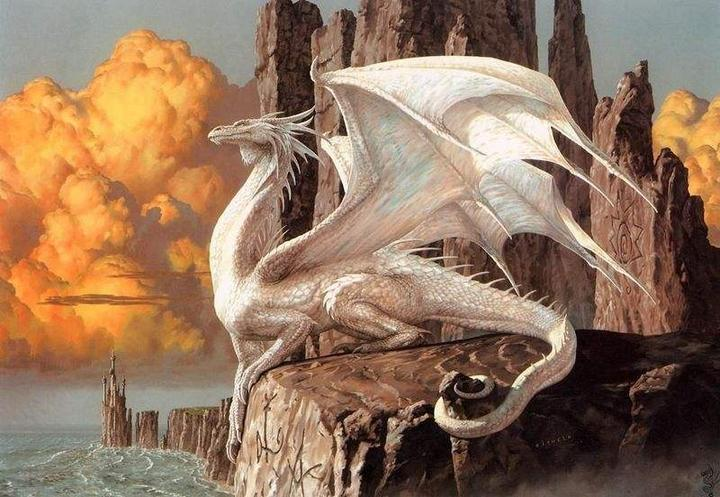

In [2]:

from pathlib import Path
import os
DATA_DIR =  "/workspace/all-in-rag/data/C3"
from glob import glob

img_list = glob(os.path.join(DATA_DIR, "dragon", "*.png"))
print(img_list)
from IPython.display import Image
Image(filename=img_list[0])


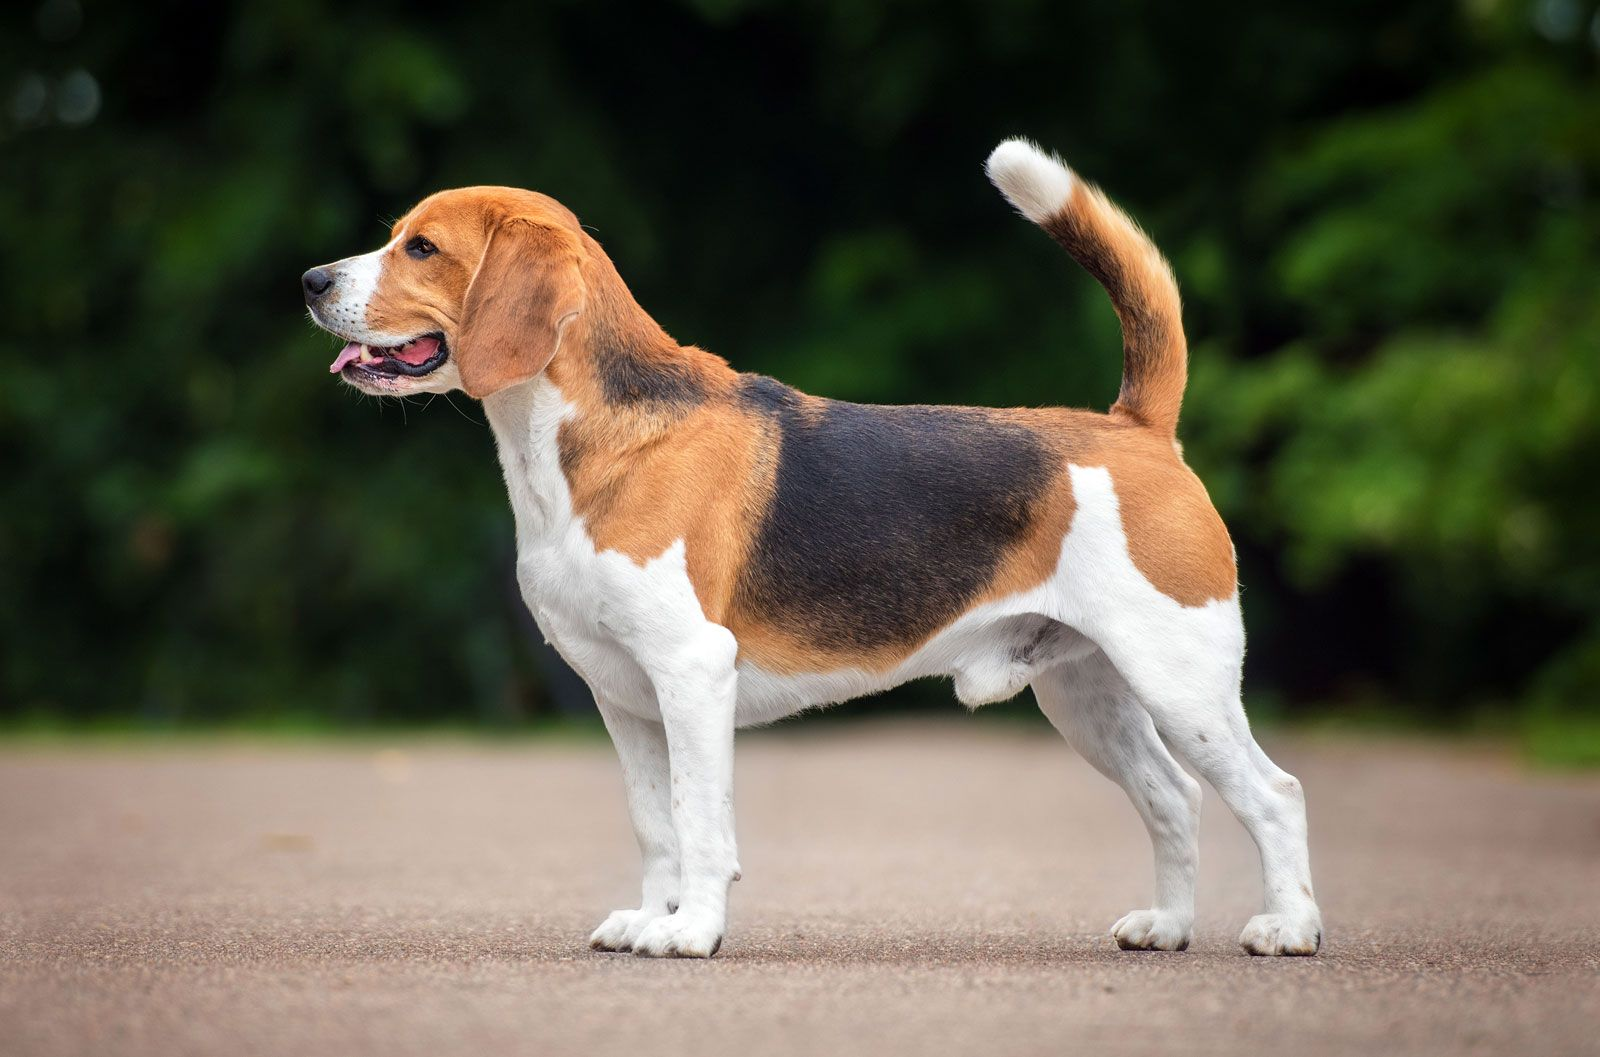

In [13]:
Image("https://cdn.britannica.com/16/234216-050-C66F8665/beagle-hound-dog.jpg")

## Image Handle

In [16]:
import numpy as np
rgb_pixel = np.array([255, 0, 0])   # 红色（RGB）
bgr_pixel = rgb_pixel[::-1]        # → [0, 0, 255]（BGR）
print(bgr_pixel)

[  0   0 255]


## 错误分析

/go/pkg/mod/golang.org/x/sync@v0.12.0/errgroup/errgroup.go:78 golang.org/x/sync/errgroup.(*Group).Go.func1
/usr/local/go/src/runtime/asm_amd64.s:1700 runtime.goexit: rpc error: code = Unknown desc = node not match[expectedNodeID=2][actualNodeID=3])>, <Time:{'RPC start': '2026-01-28 09:33:24.770544', 'RPC error': '2026-01-28 09:34:07.477880'}> (decorators.py:140)
2026-01-28 09:34:07,478 [ERROR][_create_collection_with_schema]: Failed to create collection: multimodal_demo (milvus_client.py:888)
Traceback (most recent call last):
  File "/workspace/all-in-rag/code/C3/04_multi_milvus.py", line 101, in <module>
    milvus_client.create_collection(collection_name=COLLECTION_NAME, schema=schema)
  File "/root/miniconda/envs/myrag/lib/python3.12/site-packages/pymilvus/milvus_client/milvus_client.py", line 96, in create_collection
    return self._create_collection_with_schema(